In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



In [22]:
os.chdir('C:\\Users\\Lenovo\\Desktop\\python')

In [23]:
display(os.getcwd())

'C:\\Users\\Lenovo\\Desktop\\python'

In [48]:
dts = pd.read_csv('Train.csv')
display(dts.head())
# dts
# dts.head()
# dts.tail()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
dts.shape 

(8523, 12)

In [39]:
display(dts.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
display (dts.describe())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [43]:
display (dts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

In [44]:
display (dts.apply(lambda x: len(x.unique())))


Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [53]:
display (dts.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [55]:
# categorical data in a single list ,here data is related to 'object' datatype
cat_col = []
for x in dts.dtypes.index:
    if dts.dtypes[x] == 'object':
        cat_col.append(x)
display (cat_col)


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [56]:
# Delete the columns - remove function can be used to delete values from the list
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
display (cat_col)


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [58]:
# Display the Unique Values in category columns – Count 
for col in cat_col:
    print(col , len(dts[col].unique()))


Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [61]:
# Unique values in each category
for col in cat_col:
    # print(col)
    print(dts[col].value_counts())
    print()
    print ('*' *50)


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

**************************************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

**************************************************
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

**************************************************
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

*****************************

In [62]:
# Display the missing values - missing values will be True 
miss_bool = dts['Item_Weight'].isnull()
display (miss_bool)


0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [63]:
# Missing value count - column - Item_Weight

display (dts['Item_Weight'].isnull().sum())


1463

In [64]:
# Display all NULL Records 
Item_Weight_null = dts[dts['Item_Weight'].isna()]
display (Item_Weight_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [65]:
# NULL Records by Item Identifier column 
Item_Weight_null['Item_Identifier'].value_counts()


Item_Identifier
FDK08    2
FDA08    2
FDV23    2
FDY56    2
FDI04    2
        ..
FDM44    1
FDZ48    1
FDK41    1
FDD57    1
NCN18    1
Name: count, Length: 1142, dtype: int64

In [67]:
# Find the mean for the column – Item Weight group by Item Identifier 
item_weight_mean = dts.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
display (item_weight_mean)


,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [68]:
# Display Item Identifier column  
display (dts['Item_Identifier'])


0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [79]:
# Fill the missing values (Item Weight) with mean, the mean calculated by group by Item identifier  
for i, item in enumerate(dts['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean.index:
            dts['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            dts['Item_Weight'][i] = np.mean(dts['Item_Weight'])
            
result = dts['Item_Weight'].isnull().sum() #Check the Null values again – Same column 
display (result)

result = dts.groupby('Outlet_Size').agg({'Outlet_Size': np.size}) #Record count based on 'Outlet_Size'
display (result)



0

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [80]:
#NULL Record based on 'Outlet_Size'

result= dts['Outlet_Size'].isnull().sum()
display (result)


2410

In [81]:
# Display all NULL Records 

Outlet_Size_null= dts[dts['Outlet_Size'].isna()]
display (Outlet_Size_null)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [82]:
#Outlet Type Null Records 
result = Outlet_Size_null['Outlet_Type'].value_counts()
display (result)


Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [86]:
# Identify most repeated value - mode
outlet_size_mode = dts.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)



Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [90]:
# Use Mode to fill missing values 
miss_bool = dts['Outlet_Size'].isnull()
dts.loc[miss_bool, 'Outlet_Size'] = dts.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])



In [99]:
miss_bool = dts['Outlet_Size'].isnull()
for i, item in enumerate (dts['Outlet_Size']):
    if miss_bool[i]:
        dts['Outlet_Size'][i] = outlet_size_mode.loc['Outlet_Size',dts['Outlet_Type'][i] ]
display (dts['Outlet_Size'].isnull().sum()) #Check the Null values  



0

In [101]:
# Check the group by count to see if the count increased 
result = dts.groupby (['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small              1083
Supermarket Type1 High                932
                  Medium              930
                  Small              3715
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [103]:
# Check Item visibility column with value - 0
display (sum(dts['Item_Visibility']==0))


526

In [107]:
# Replace zeros with mean
dts.loc[:, 'Item_Visibility'].replace([0], [dts['Item_Visibility'].mean()], inplace=True)
# Check any value with 0 again 
display(sum(dts['Item_Visibility']==0))


0

In [109]:
# Check distinct values - Item_Fat_Content
result = dts['Item_Fat_Content'].value_counts()
display (result)


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [111]:
# Consolidate similar Column Values 
dts['Item_Fat_Content'] = dts['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
result = dts['Item_Fat_Content'].value_counts()
display (result)


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [112]:
# Create new attributes with first two characters of item identifier column
dts['New_Item_Type'] = dts['Item_Identifier'].apply(lambda x: x[:2])
display (dts['New_Item_Type'])


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [ ]:

# Display Number of records in each category 
display (dt['New_Item_Type'].value_counts())


In [113]:
# Map the values
dts['New_Item_Type'] = dts['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
display (dts['New_Item_Type'].value_counts())

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [114]:
# Display distinct values in Item_Fat_Content

display (dts['Item_Fat_Content'].value_counts())

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [116]:
#Display the count based on New_Item_Type and Item_Fat_Content
result = dts.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [118]:
# Update Item_Fat_Content  to ‘Non Edible’  where New_Item_Type = Non-Consumable

dts.loc[dts['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
result =  (dts['Item_Fat_Content'].value_counts())
display (result)


Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [119]:
# Display the count based on New_Item_Type and Item_Fat_Content
result = dts.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})
display (result)


Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [122]:
dts['Outlet_Years'] = 2024 - dts['Outlet_Establishment_Year']
print (dts['Outlet_Years'])


0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Years, Length: 8523, dtype: int64


In [124]:
# Display Top 5 Records 
display (dts.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,26
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,37


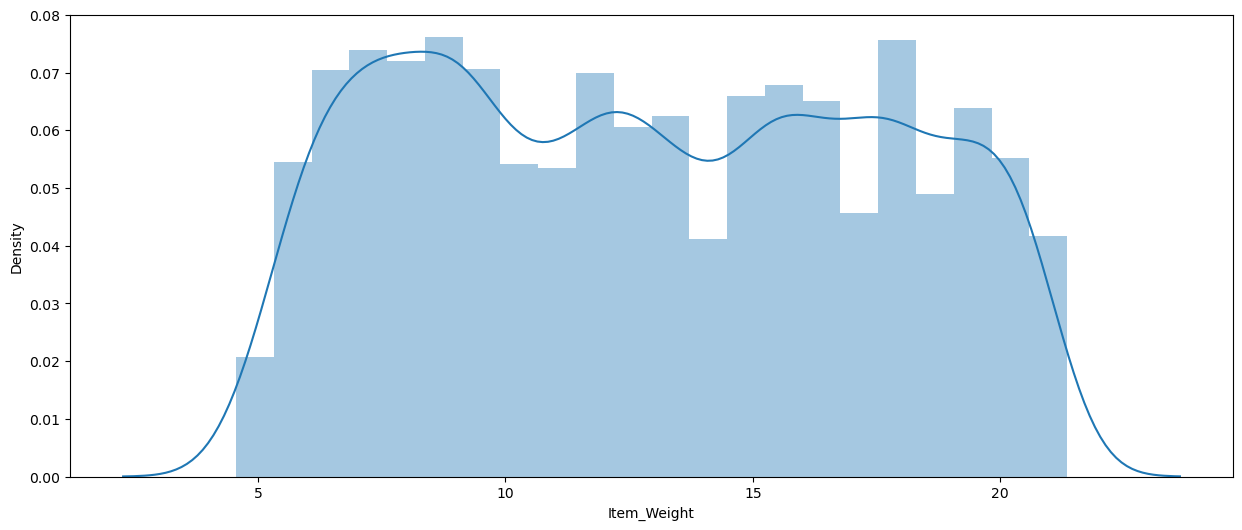

In [126]:
# Cresate Dist Plot – Item Weight  
sns.distplot(dts['Item_Weight'])
plt.show()


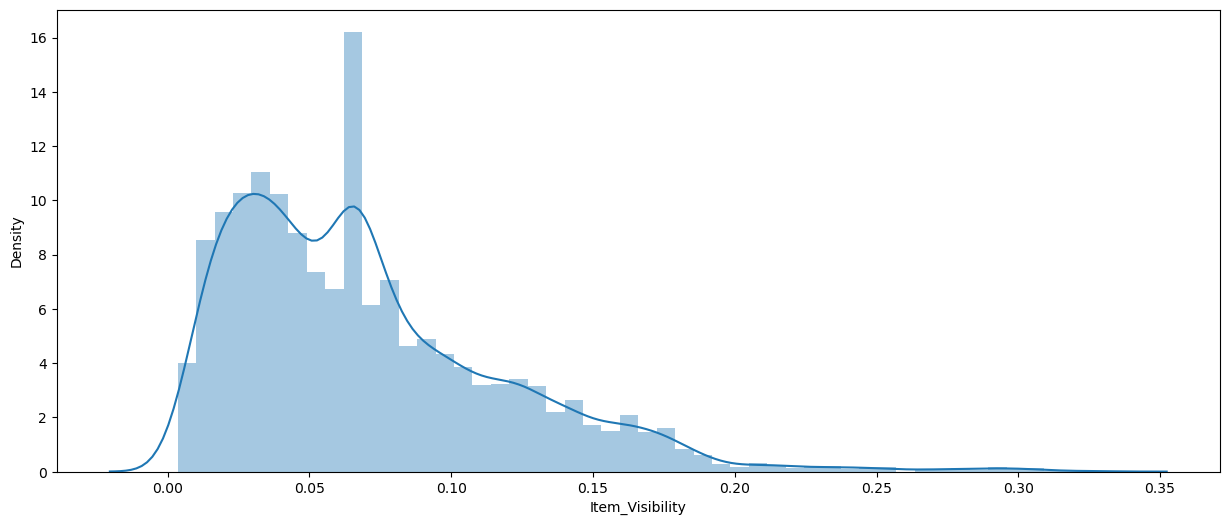

In [127]:
# Create Dist Plot – Item Visibility 
sns.distplot(dts['Item_Visibility'])
plt.show()


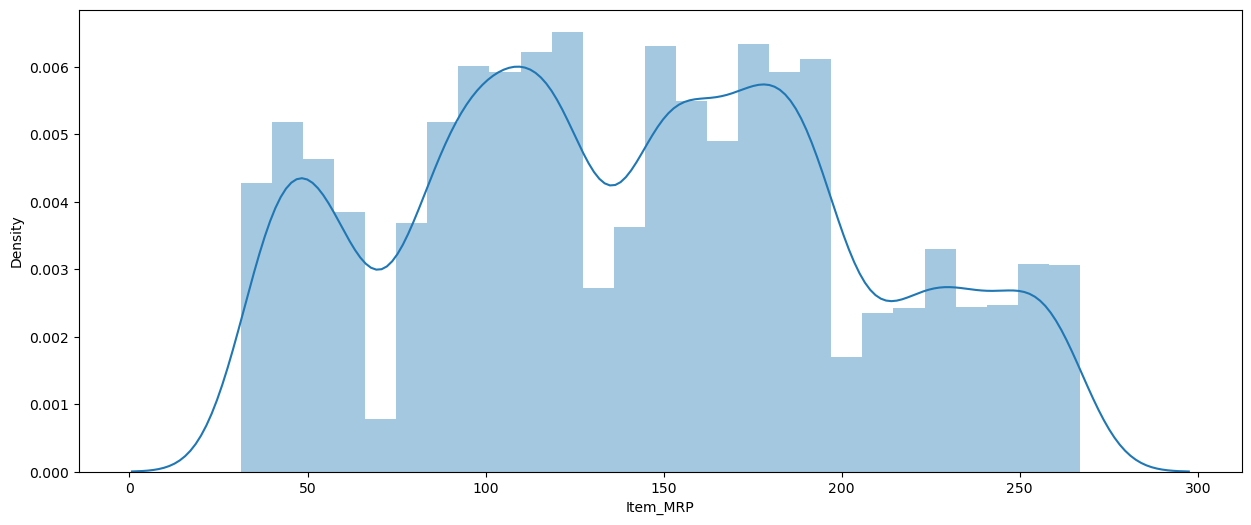

In [129]:
# Create Dist Plot – Item MRP 
sns.distplot(dts['Item_MRP'])
plt.show()


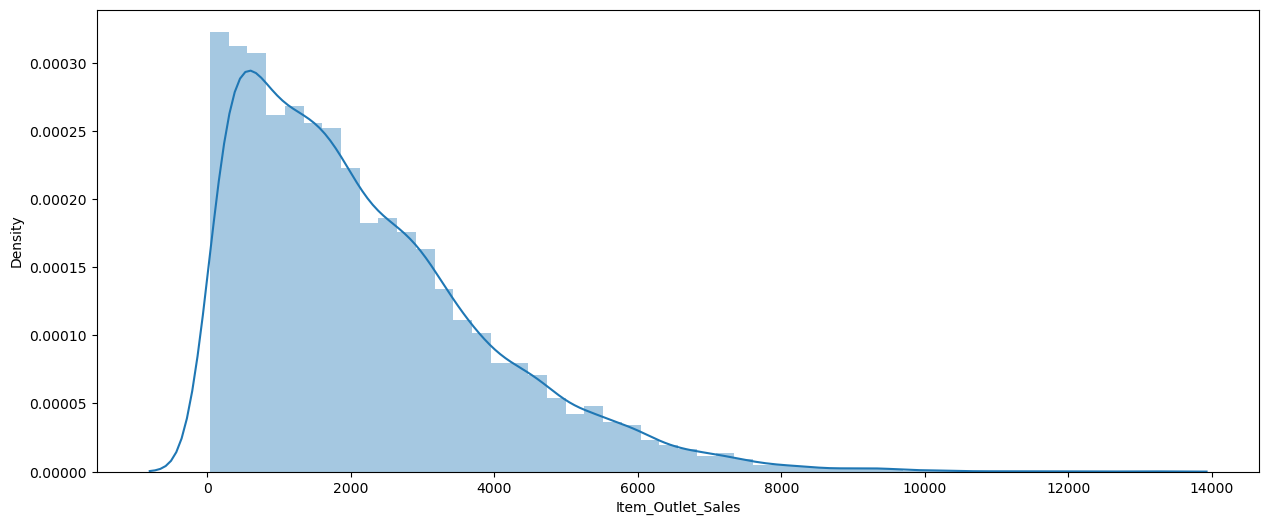

In [130]:
# Create Dist Plot – Item Outlet Sales 
sns.distplot(dts['Item_Outlet_Sales'])
plt.show()


In [131]:
# The above graph is right skewed and there could be some outliers so to reduce them we use log transformation
dts['Item_Outlet_Sales'] = np.log(1+dts['Item_Outlet_Sales'])
display (dts['Item_Outlet_Sales'])


0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

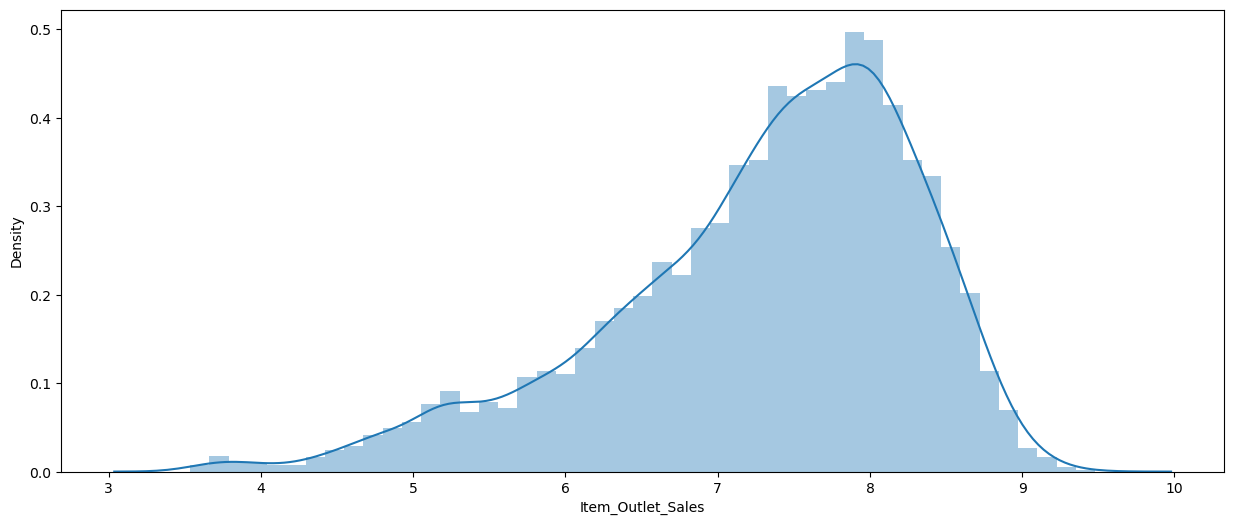

In [133]:
# Create Dist Plot – again 
sns.distplot(dts['Item_Outlet_Sales'])
plt.show()


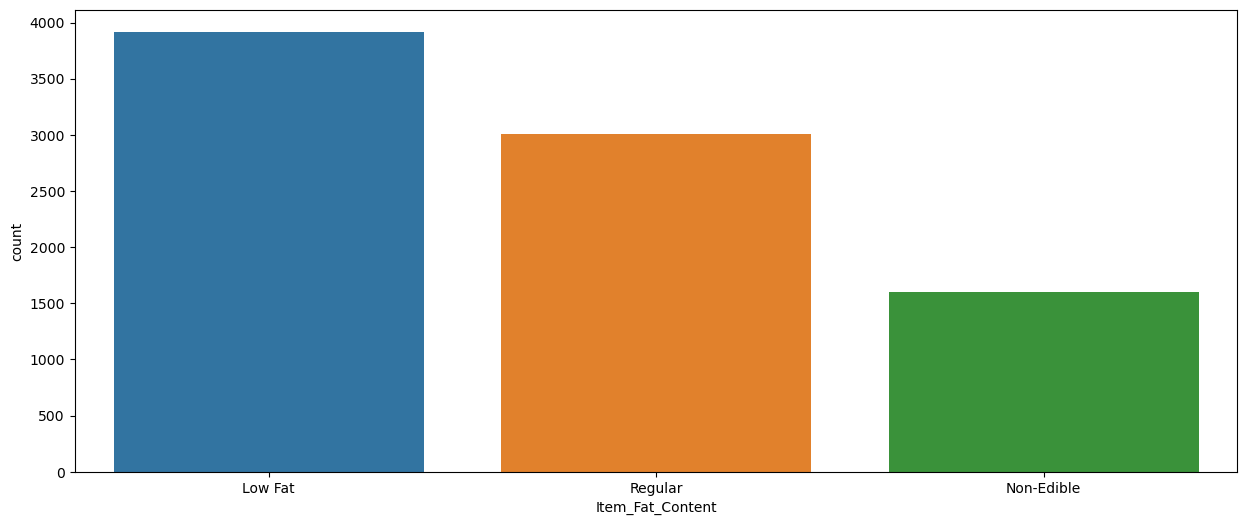

In [134]:
# Create Count Plot – Number of records in each category 
sns.countplot(x = dts["Item_Fat_Content"])
plt.show()


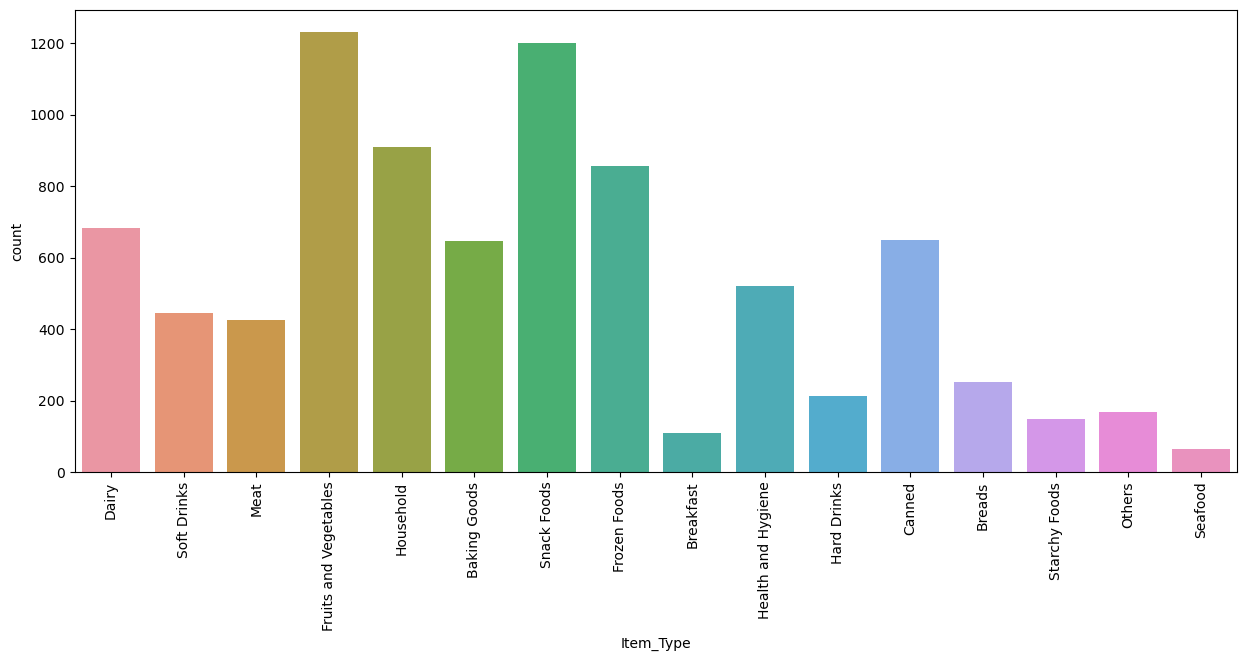

In [135]:
# l is the list of unique Item Types - This is used to display X-Label 

l = list(dts['Item_Type'].unique()) 
chart = sns.countplot(x =dts["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)
plt.show()


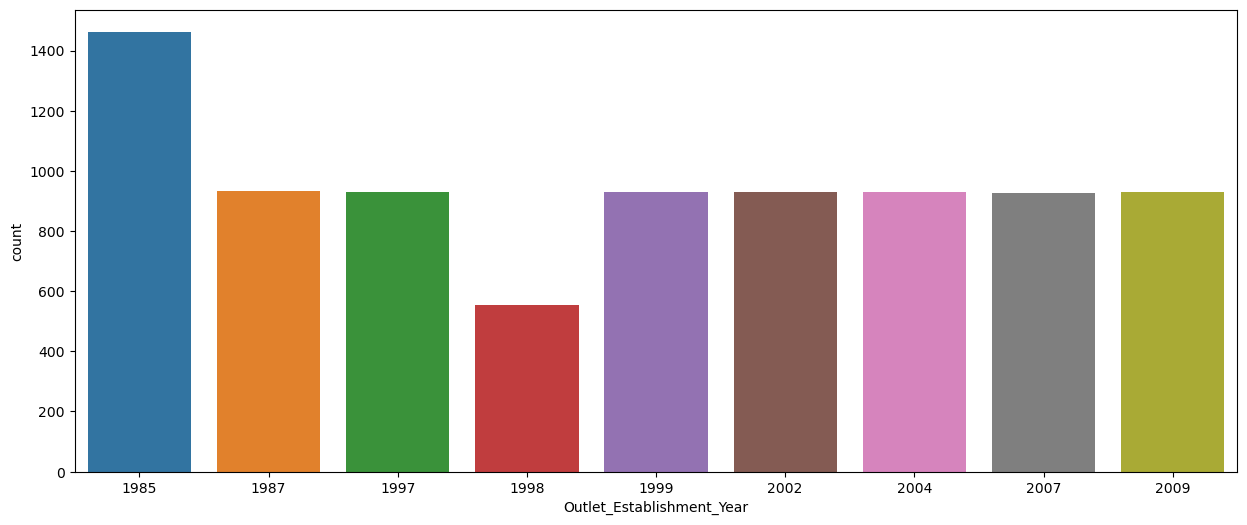

In [137]:
# Number of stores started per year  
sns.countplot(x= dts['Outlet_Establishment_Year'])
plt.show()


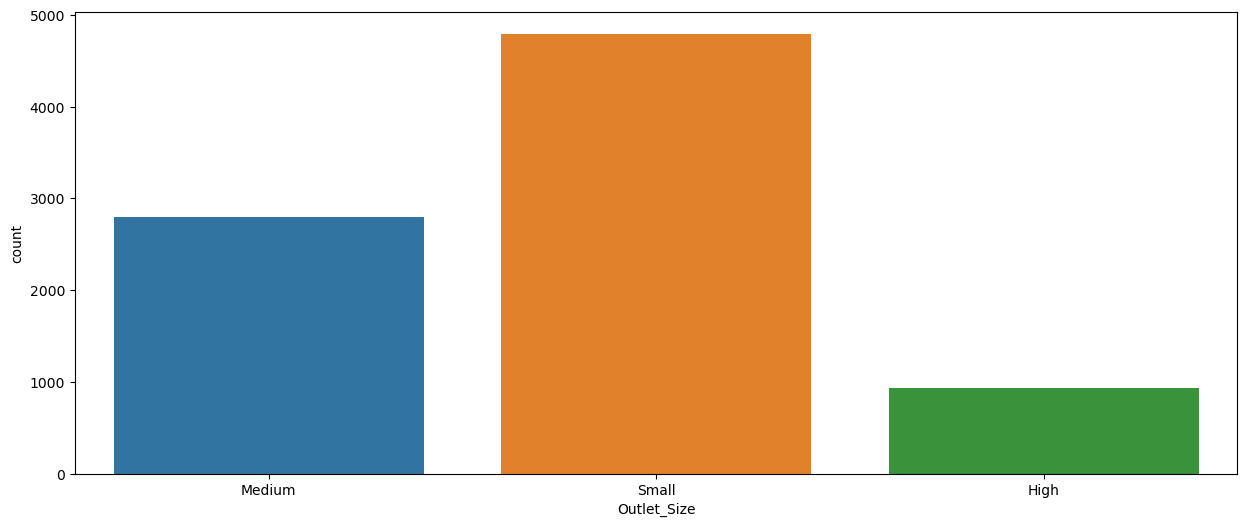

In [138]:
# Count Plot Outlet Size 
sns.countplot(x=dts['Outlet_Size'])
plt.show()


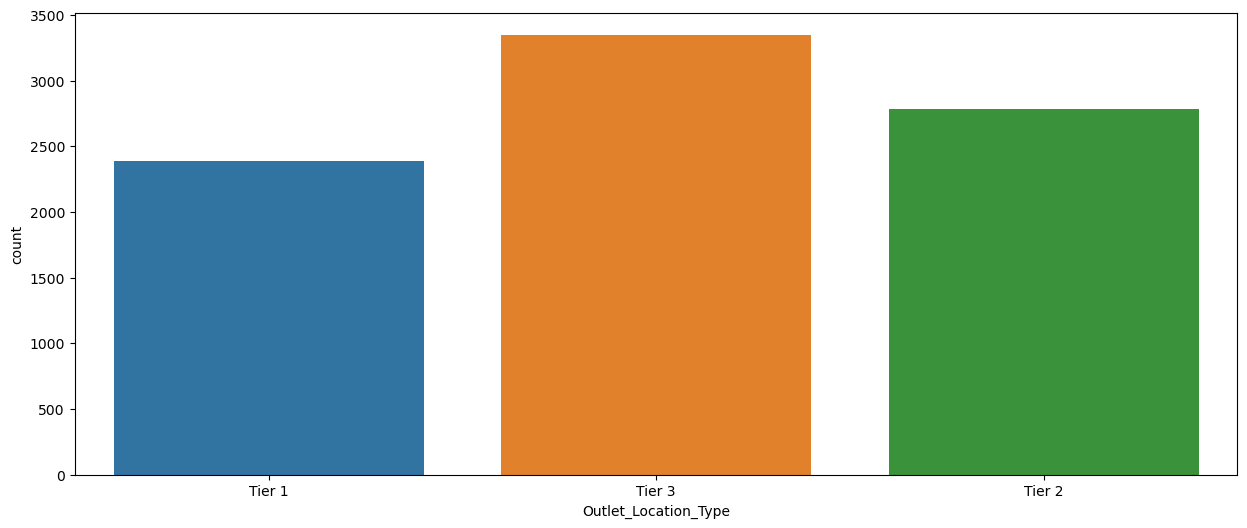

In [140]:
# Count Plot Outlet Location Type 

sns.countplot(x=dts['Outlet_Location_Type'])
plt.show()


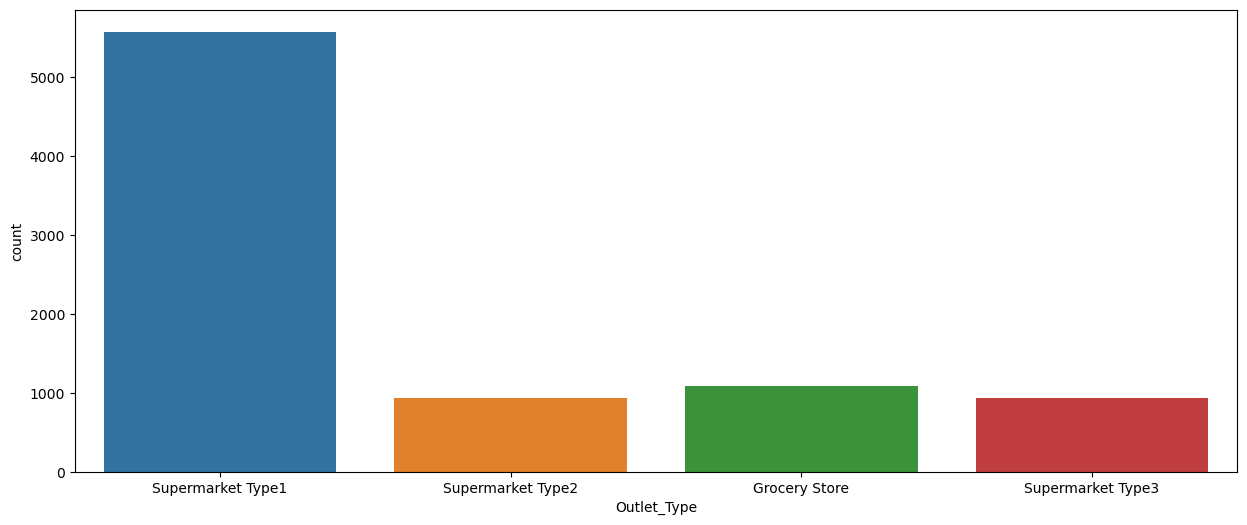

In [141]:
# Count Plot Outlet Type 
sns.countplot(x= dts['Outlet_Type'])
plt.show()


In [143]:
# Display top 3 records to check columns with numeric values 
display(dts.head(3))


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25


In [144]:

# Create Data Frame with numeric columns 

dtc= dts.iloc[:,[1,3,5,7,11,13]]
display (dtc)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,1999,8.225808,25
1,5.920,0.019278,48.2692,2009,6.096776,15
2,17.500,0.016760,141.6180,1999,7.648868,25
3,19.200,0.066132,182.0950,1998,6.597664,26
4,8.930,0.066132,53.8614,1987,6.903451,37
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,7.929984,37
8519,8.380,0.046982,108.1570,2002,6.310436,22
8520,10.600,0.035186,85.1224,2004,7.085159,20
8521,7.210,0.145221,103.1332,2009,7.521100,15


In [145]:
# Print Co relation 
corr = dtc.corr()
display (corr)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017476,0.025972,-0.013418,0.007674,0.013418
Item_Visibility,-0.017476,1.000000,-0.005259,-0.078355,-0.202466,0.078355
Item_MRP,0.025972,-0.005259,1.000000,0.005020,0.509886,-0.005020
Outlet_Establishment_Year,-0.013418,-0.078355,0.005020,1.000000,0.077032,-1.000000
Item_Outlet_Sales,0.007674,-0.202466,0.509886,0.077032,1.000000,-0.077032
Outlet_Years,0.013418,0.078355,-0.005020,-1.000000,-0.077032,1.000000


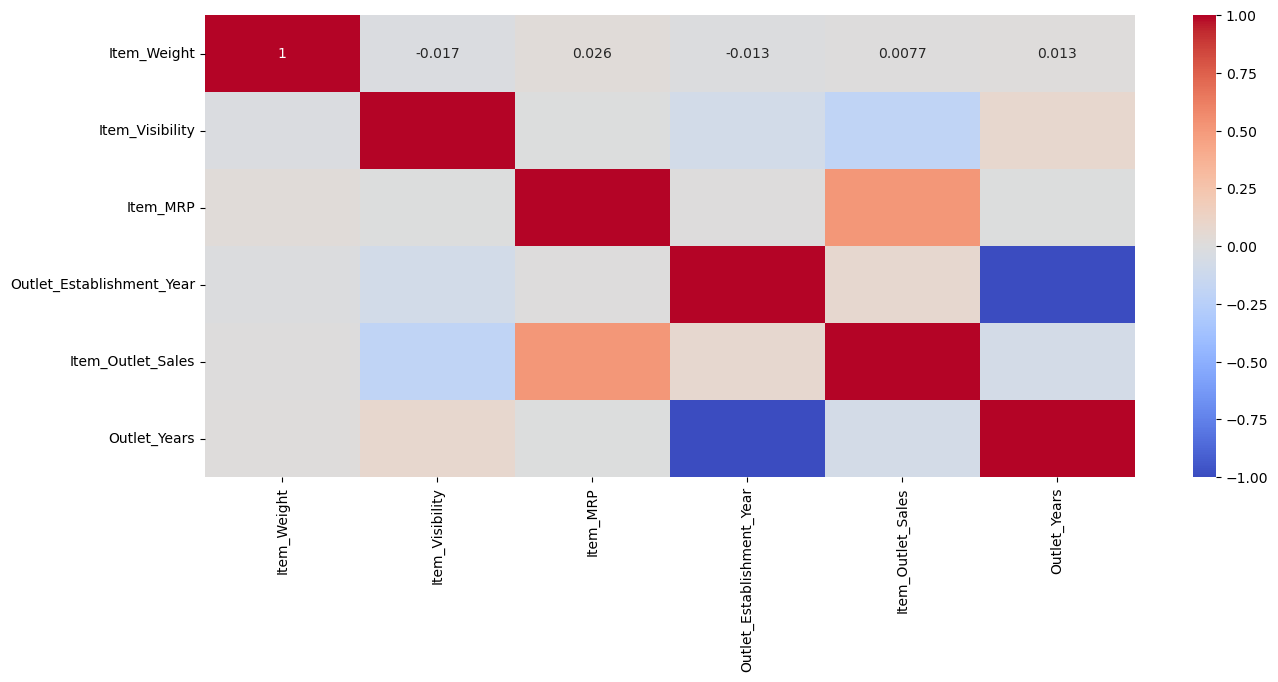

In [146]:
# Print Co Relation Matrix 

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [148]:
# Display Top 5 Records  

display (dts.head())


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,25
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,26
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,37


In [152]:

# Label Encoding – Column Outlet Identifier 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dts['Outlet'] = le.fit_transform(dts['Outlet_Identifier'])
display (dts['Outlet'])


0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [155]:
# Label Encoding – Remaining columns with For loop  
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    dts[col] = le.fit_transform(dts[col])
display (dts.head())  


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,25,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,15,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,25,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,26,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,37,1


In [156]:
# One hot Encoding
dts = pd.get_dummies(dts, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
display (dts.head())


,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,25,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,15,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,25,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,26,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,37,1,...,0,0,1,0,1,0,0,0,0,1


In [157]:
# Create X – Remove un used columns 
X = dts.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
display (X.head())


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,25,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,15,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,25,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,6,182.0950,26,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,9,53.8614,37,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [158]:
# Create y 
y = dts['Item_Outlet_Sales']
display (y.head())


0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Item_Outlet_Sales, dtype: float64

In [159]:
# Train Test Split  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print (X.shape, y.shape)
print (X_train.shape, X_test.shape ,  y_train.shape, y_test.shape)


(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)


In [160]:
# function to ceate model
from sklearn import metrics 
display (",   ".join(metrics.get_scorer_names()))


'accuracy,   adjusted_mutual_info_score,   adjusted_rand_score,   average_precision,   balanced_accuracy,   completeness_score,   explained_variance,   f1,   f1_macro,   f1_micro,   f1_samples,   f1_weighted,   fowlkes_mallows_score,   homogeneity_score,   jaccard,   jaccard_macro,   jaccard_micro,   jaccard_samples,   jaccard_weighted,   matthews_corrcoef,   max_error,   mutual_info_score,   neg_brier_score,   neg_log_loss,   neg_mean_absolute_error,   neg_mean_absolute_percentage_error,   neg_mean_gamma_deviance,   neg_mean_poisson_deviance,   neg_mean_squared_error,   neg_mean_squared_log_error,   neg_median_absolute_error,   neg_negative_likelihood_ratio,   neg_root_mean_squared_error,   normalized_mutual_info_score,   positive_likelihood_ratio,   precision,   precision_macro,   precision_micro,   precision_samples,   precision_weighted,   r2,   rand_score,   recall,   recall_macro,   recall_micro,   recall_samples,   recall_weighted,   roc_auc,   roc_auc_ovo,   roc_auc_ovo_weighte

In [163]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    # training the model
    model.fit(X, y)
    
    pred = model.predict(X)
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    print ('Accuracy for full Data')
    print('R2_Score:', r2_score(y,pred))
    print ()


Model Report
Scoring - neg_mean_squared_error
[-0.29271824 -0.27380022 -0.28650686 -0.28450916 -0.28157838]
ABS Average of - neg_mean_squared_error 0.2838225716352715

R2 Score 
[0.69534636 0.73185961 0.7163057  0.73463311 0.72780317]
Average R2 Score  0.7211895883640435

Accuracy for full Data
R2_Score: 0.7232625001989983

Outlet_Type_0            -1.254723
Outlet_Size_1            -0.735141
Outlet_Size_2            -0.575278
Outlet_Type_1            -0.476526
Outlet_Location_Type_2   -0.383803
Outlet_Type_2            -0.293352
Outlet_Years             -0.073229
Item_Visibility          -0.038618
New_Item_Type_0          -0.026509
Item_Fat_Content_0       -0.010449
Item_Weight              -0.001516
Item_Type                 0.000923
Item_Fat_Content_2        0.005071
Item_Fat_Content_1        0.005377
New_Item_Type_2           0.005377
Item_MRP                  0.008172
New_Item_Type_1           0.021131
Outlet_Location_Type_1    0.030356
Outlet                    0.061955
Outlet_Lo

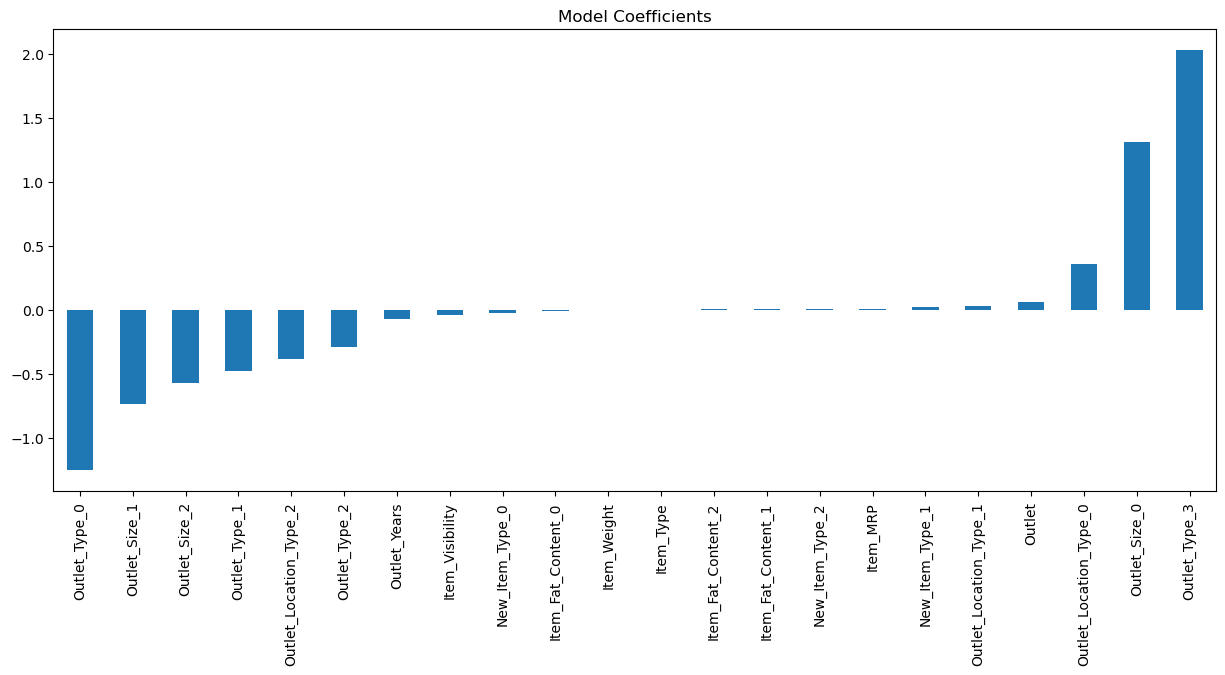

In [162]:
# Create Linear Regression Model  

from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
print (coef)
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.29241213 -0.27413941 -0.28699291 -0.28451826 -0.28187389]
ABS Average of - neg_mean_squared_error 0.2839873170429864

R2 Score 
[0.69566495 0.73152744 0.71582442 0.73462463 0.72751751]
Average R2 Score  0.7210317872850316

Accuracy for full Data
R2_Score: 0.7230806636664813



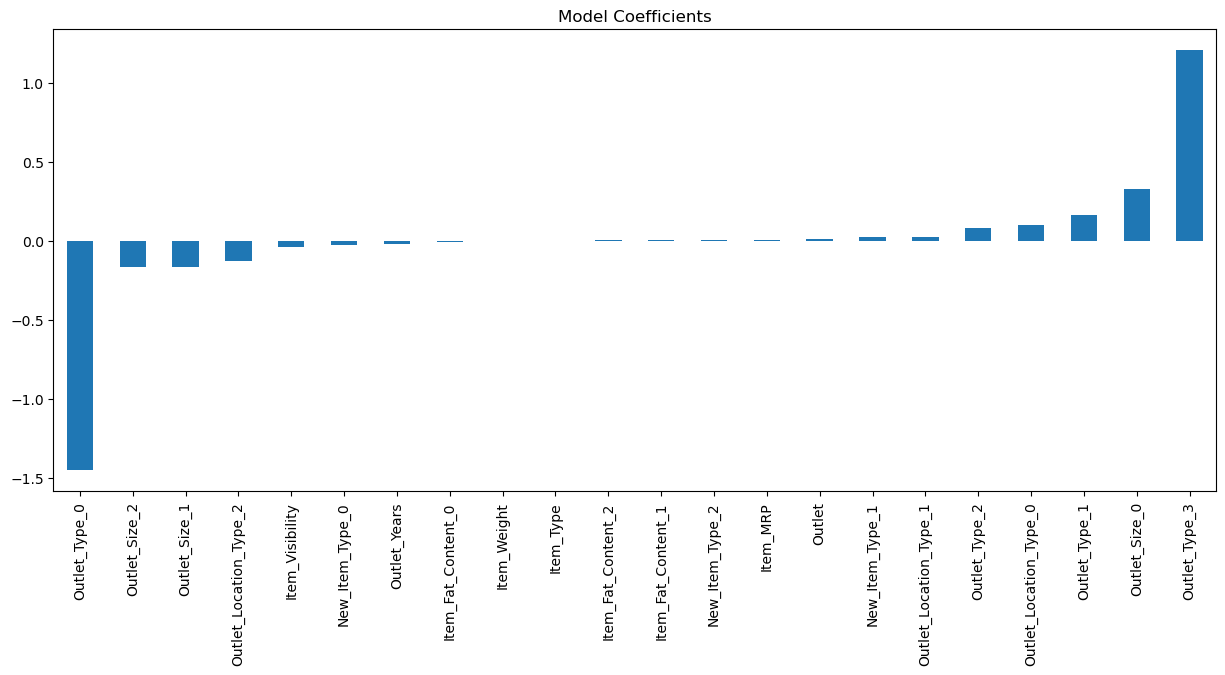

In [164]:
# Create Ridge Regression 
model = Ridge()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.72314998 -0.75701947 -0.75847666 -0.74093272 -0.78787083]
ABS Average of - neg_mean_squared_error 0.7534899315973709

R2 Score 
[0.24736402 0.25862917 0.24896908 0.30891853 0.23837923]
Average R2 Score  0.2604520071591053

Accuracy for full Data
R2_Score: 0.26227683517122646



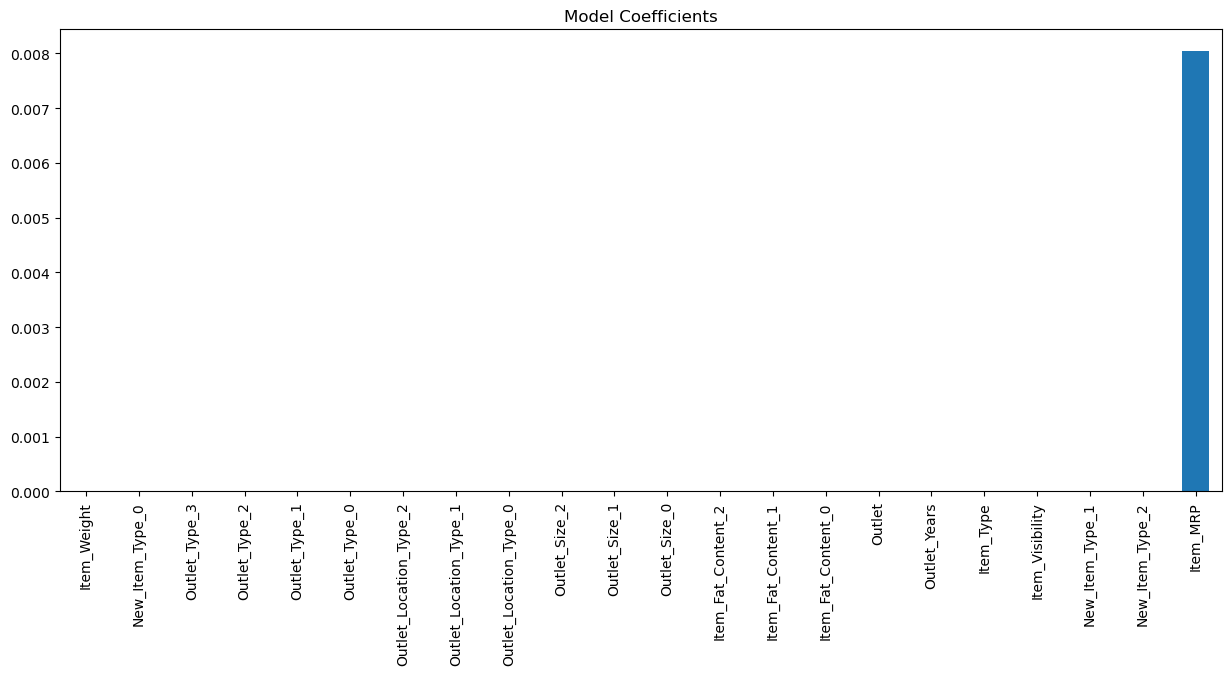

In [165]:
# Create  Lasso Regression 

model = Lasso()
train(model, X_train, y_train)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.56110101 -0.55773568 -0.53449126 -0.54738533 -0.57058789]
ABS Average of - neg_mean_squared_error 0.5542602348294843

R2 Score 
[0.40741268 0.45805902 0.46892572 0.49133003 0.46394501]
Average R2 Score  0.4579344921084442

Accuracy for full Data
R2_Score: 1.0



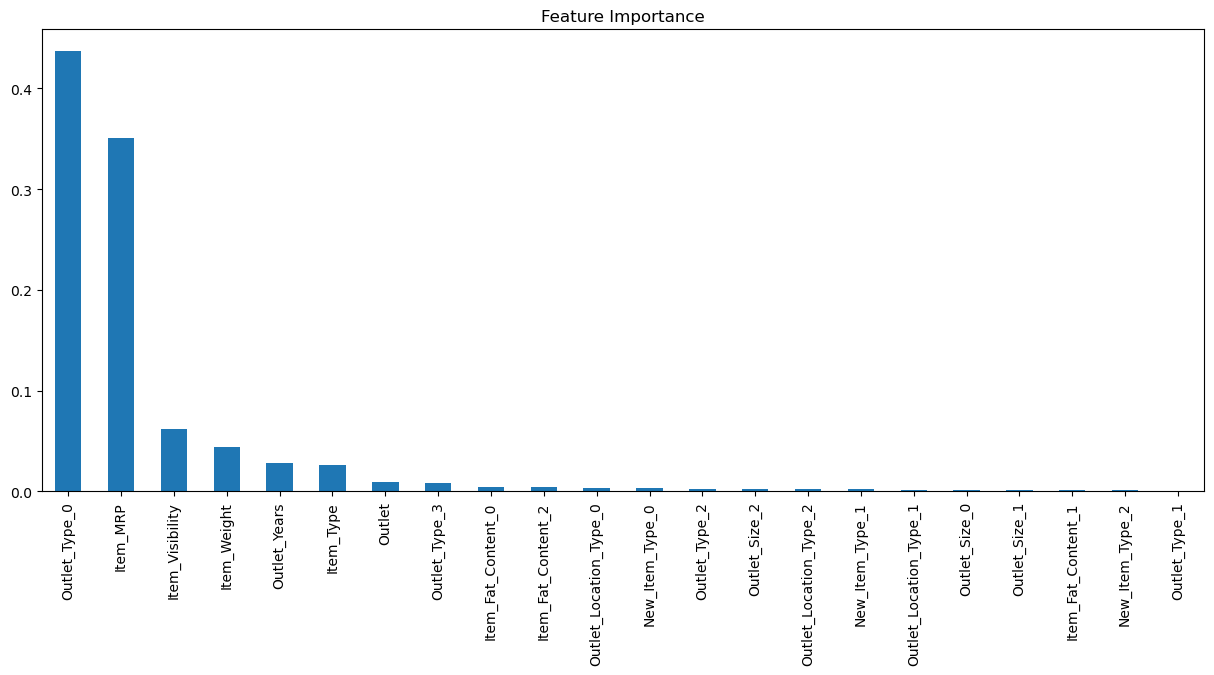

In [166]:
# Decision Tree Regression  

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.30919784 -0.28237003 -0.30788154 -0.29123457 -0.30244652]
ABS Average of - neg_mean_squared_error 0.2986260979746498

R2 Score 
[0.67664344 0.723807   0.69686235 0.73101019 0.70625258]
Average R2 Score  0.7069151119058483

Accuracy for full Data
R2_Score: 0.9596389130737655



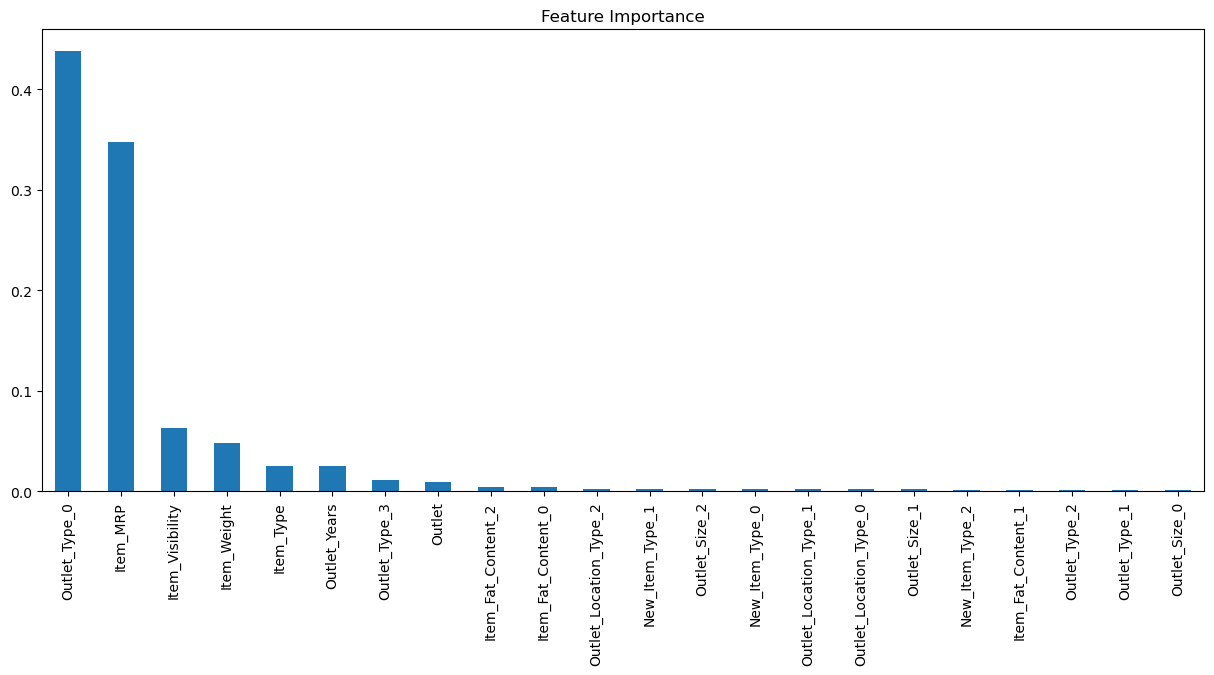

In [167]:
# Random Forest Regression  
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.33263718 -0.31157307 -0.3199245  -0.31927689 -0.3197868 ]
ABS Average of - neg_mean_squared_error 0.32063969032890394

R2 Score 
[0.6520155  0.6931432  0.68169001 0.69903354 0.69185759]
Average R2 Score  0.6835479691339312

Accuracy for full Data
R2_Score: 1.0



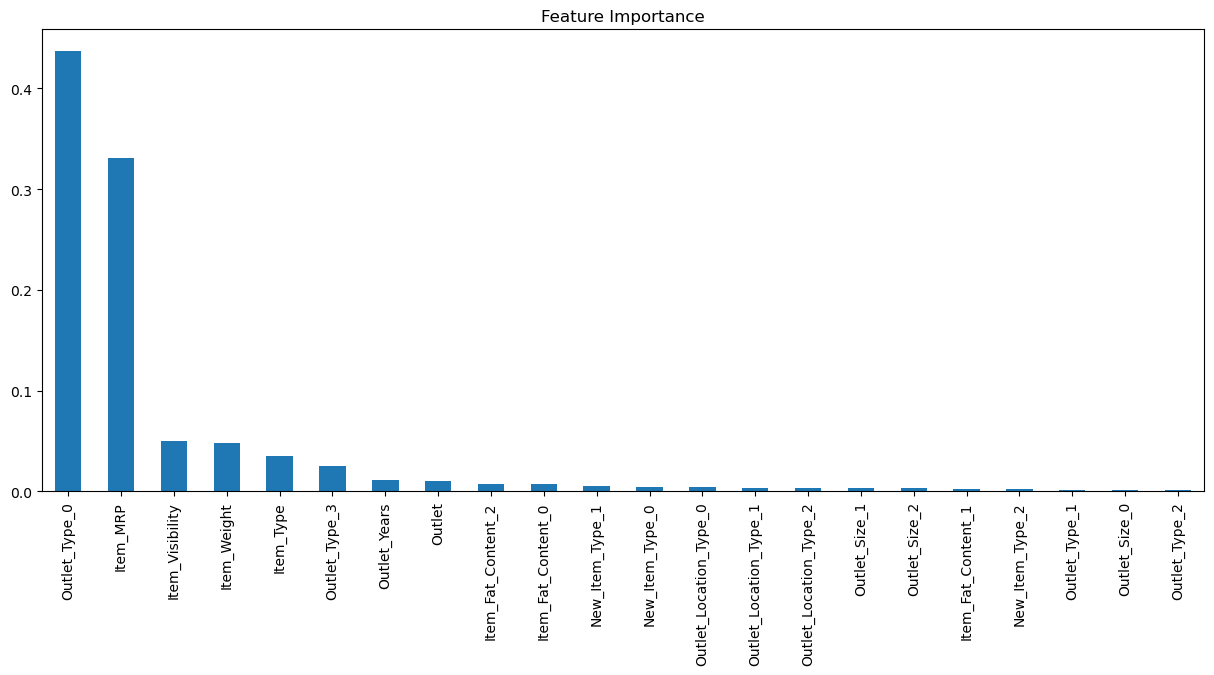

In [169]:
# Extra Tree Regression  
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 22
[LightGBM] [Info] Start training from score 7.295854
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 4772, number of used features: 22
[LightGBM] [Info] Start training from score 7.292207
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 477

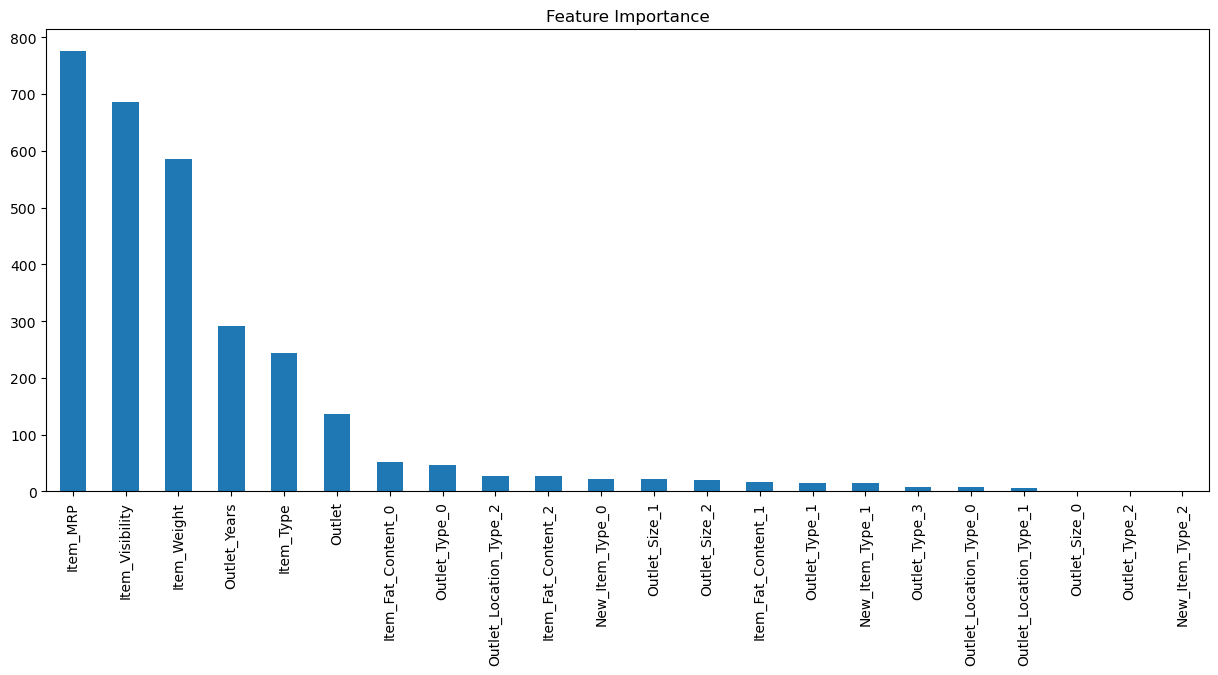

In [171]:
# LGBMRegressor

from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


Model Report
Scoring - neg_mean_squared_error
[-0.34171575 -0.29940184 -0.32970416 -0.31770428 -0.32953668]
ABS Average of - neg_mean_squared_error 0.3236125411964996

R2 Score 
[0.644351   0.70678721 0.67353245 0.70367142 0.68144273]
Average R2 Score  0.6819569626413553

Accuracy for full Data
R2_Score: 0.9120531911594594



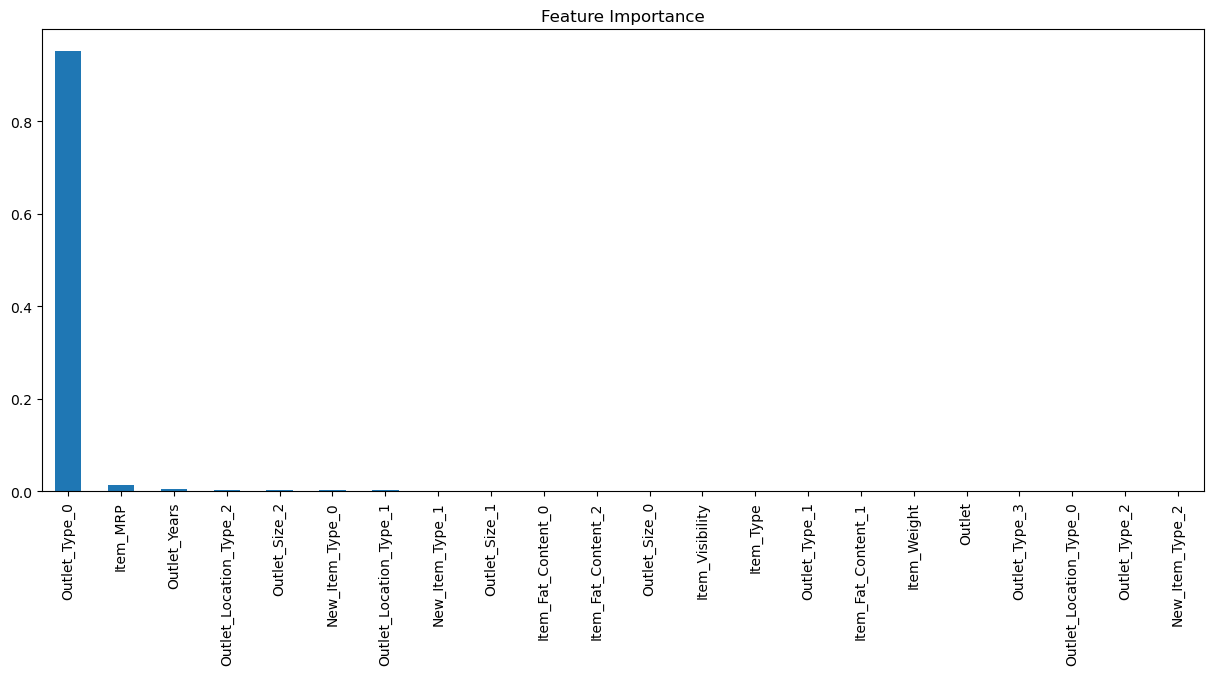

In [175]:
# XG Boost Regressor 
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X_train, y_train)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()


In [176]:
# Random Search CV  

from sklearn.model_selection import RandomizedSearchCV
# Parameters   
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
# Param Grid    
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [177]:
# Random Forest Regression 

rf = RandomForestRegressor()
rf=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
display (rf.fit(X_train, y_train))

# Best Parameters  

print(rf.best_params_)
print(rf.best_score_)
predictions=rf.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)         


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 5}
-0.2689669210080161


0.7262086958734212

array([7.71252994, 7.53490602, 7.53363759, ..., 7.46075314, 7.69124496,
       7.85269757])

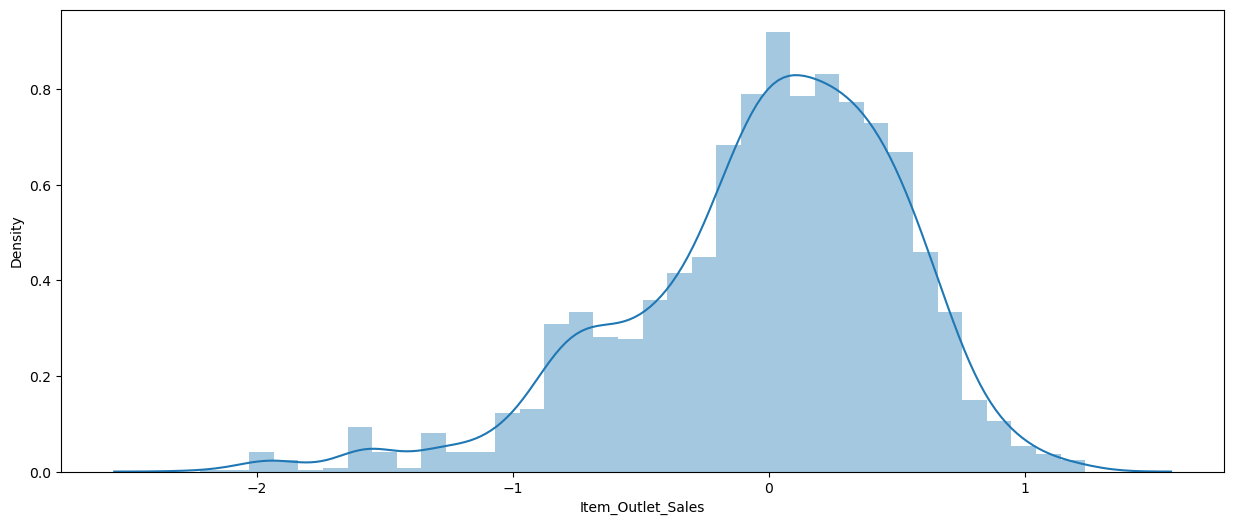

In [178]:
# Create the Dist plot 
sns.distplot(y_test-predictions)
plt.show()


In [179]:
# Parameter for LGBM Regressor 

from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [180]:
# Model LGBM Regressor 
lgb=LGBMRegressor()
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(X,y)

# Best Parameter  
print(lgb.best_params_)
print(lgb.best_score_)
predictions=lgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions) 



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 22
[LightGBM] [Info] Start training from score 7.296077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

0.7378840825312187

array([7.76943348, 7.43403433, 7.51033891, ..., 7.39307919, 7.75267129,
       7.85537919])

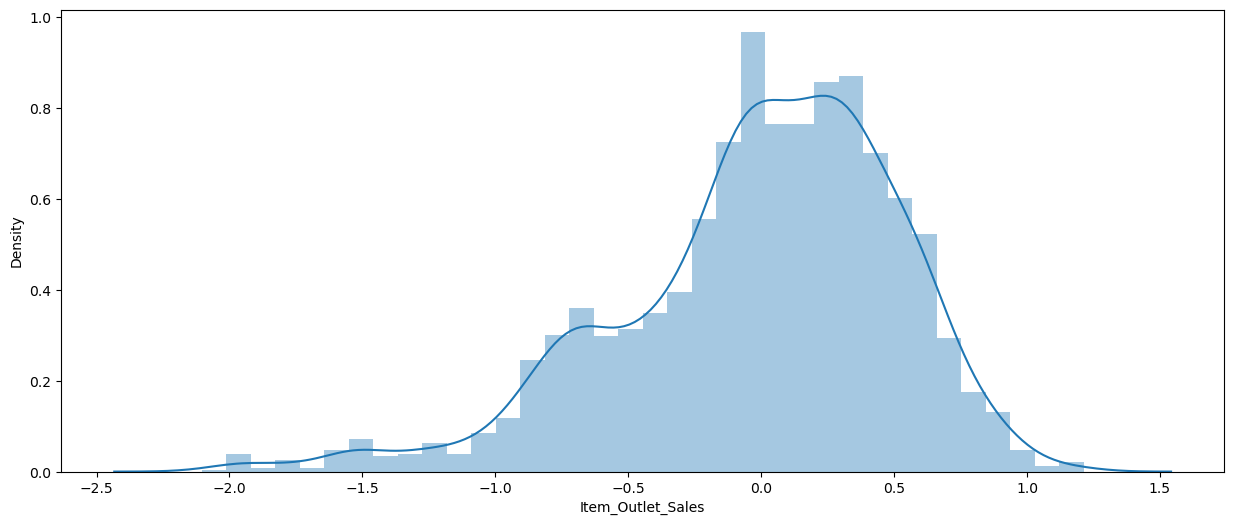

In [181]:
# Create Dist Plot  
sns.distplot(y_test-predictions)
plt.show()
# Model XG Boost  
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}


In [182]:
# XG Boost Regressor  
xgb = RandomizedSearchCV(estimator = model, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(X,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.3s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.3s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.3s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.2s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.2s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.2s
[CV] END gamma=0.07800932022121826, le

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002108F739650>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000210FCB9B590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002108F76F910>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002108F776710>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [183]:
# Print Best Parameter   

print(xgb.best_params_)
print(xgb.best_score_)
predictions=xgb.predict(X_test)
display (r2_score (y_test,predictions))
display (predictions)


{'gamma': 0.22007624686980065, 'learning_rate': 0.06661147045343364, 'max_depth': 2, 'n_estimators': 107, 'subsample': 0.6137554084460873}
-0.26945651877072835


0.7391462915552081

array([7.7549877, 7.417403 , 7.5525136, ..., 7.356347 , 7.753353 ,
       7.8522286], dtype=float32)

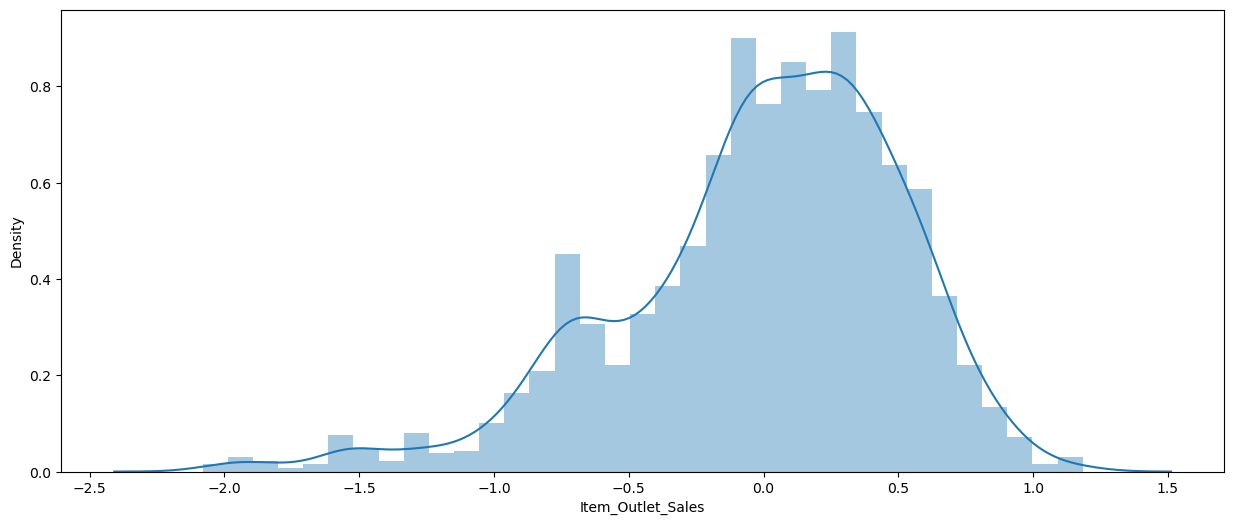

In [184]:

# Create Dist plot    

sns.distplot(y_test-predictions)
plt.show()
